<a href="https://colab.research.google.com/github/Madhan-sukumar/NLP/blob/main/Sentiment%20Analysis%20on%20Amazon%20Food%20Reviews/Sentiment_Analysis_on_Amazon_Food_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About project**: 

The Goal is to do Natural Language Processing using Sentiment Analysis on Amazon Food Reviews. The Project done on two methods.

1. Implementing classical nlp technique using VADER sentiment analysis
2. Implementing Roberta Model from Huggigface.

Exploring and comparing how both the models performing and exploring Pretrained pipelines from Huggigface.


**About Dataset:**

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Dataset link: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#downloading dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
nltk.download('all')

In [3]:
#read data
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLTK/sentiment analysis - Amazon food reviews/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
print(df.shape)

(568454, 10)


The dataset contains 0.5 m rows, for the time sake, i took first 5000 rows

In [6]:
df= df.head(5000)
print(df.shape)


(5000, 10)


In [7]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


In [8]:
#checking contains any null values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

# QUICK EDA

In [9]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [10]:
score_counts = df['Score'].value_counts().sort_index()
score_counts

1     469
2     290
3     395
4     712
5    3134
Name: Score, dtype: int64

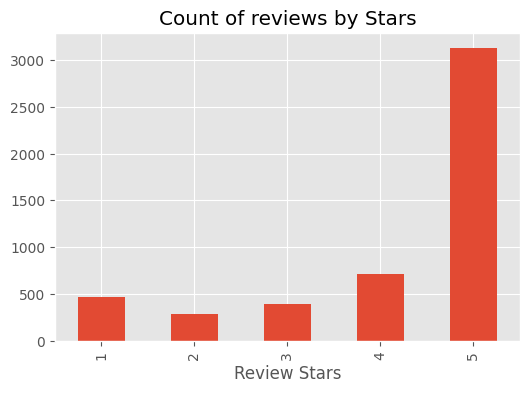

In [11]:
plt.figure(figsize=(6,4))
ax = score_counts.plot(kind='bar',title='Count of reviews by Stars')
ax.set_xlabel('Review Stars')
plt.show()



# NLTK

In [12]:
#sample data
example = df['Text'][70]
print(example)

These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local candy store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 or 5 pound bags is a screaming deal as far as I'm concerned. I'm probably 50 pounds deep in these friggin' things. Consumed!


In [13]:
# Tokenize the sample
from nltk.tokenize import word_tokenize
tokens = nltk.word_tokenize(example)

In [14]:
print(tokens[:10])

['These', 'Albanese', 'gummi', 'bears', 'and', 'rings', 'and', 'so', 'on', 'are']


In [15]:
# POS (Part of speech) Tagging https://www.guru99.com/pos-tagging-chunking-nltk.html
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
print(tagged[:10])

[('These', 'DT'), ('Albanese', 'JJ'), ('gummi', 'NN'), ('bears', 'NNS'), ('and', 'CC'), ('rings', 'NNS'), ('and', 'CC'), ('so', 'RB'), ('on', 'IN'), ('are', 'VBP')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
# chunking after processing POS
chunked = nltk.chunk.ne_chunk(tagged)
chunked.pprint() 

(S
  These/DT
  Albanese/JJ
  gummi/NN
  bears/NNS
  and/CC
  rings/NNS
  and/CC
  so/RB
  on/IN
  are/VBP
  very/RB
  good/JJ
  and/CC
  tasty/JJ
  and/CC
  high/JJ
  quality/NN
  ./.
  The/DT
  bears/NNS
  even/RB
  have/VBP
  little/JJ
  faces/VBZ
  ./.
  At/IN
  my/PRP$
  local/JJ
  candy/NN
  store/NN
  this/DT
  type/NN
  of/IN
  gummi/NN
  stuff/NN
  (/(
  bears/NNS
  ,/,
  rings/NNS
  ,/,
  snakes/NNS
  ,/,
  balls/NNS
  ,/,
  worms/NNS
  ,/,
  whatever/WDT
  )/)
  are/VBP
  about/IN
  $/$
  10/lb/CD
  ./.
  These/DT
  twin/JJ
  packs/NNS
  of/IN
  4.5/CD
  or/CC
  5/CD
  pound/NN
  bags/NNS
  is/VBZ
  a/DT
  screaming/VBG
  deal/NN
  as/RB
  far/RB
  as/IN
  I/PRP
  'm/VBP
  concerned/JJ
  ./.
  I/PRP
  'm/VBP
  probably/RB
  50/CD
  pounds/NNS
  deep/JJ
  in/IN
  these/DT
  friggin/NN
  '/''
  things/NNS
  ./.
  Consumed/VBN
  !/.)


# SENTIMENT SCORING USING VADER

For Sentiment Analysis, we’ll use VADER Sentiment Analysis, where VADER means Valence Aware Dictionary and sEntiment Reasoner.

VADER is a lexicon and rule-based feeling analysis instrument that is explicitly sensitive to suppositions communicated in web-based media. VADER utilizes a mix of lexical highlights (e.g., words) that are, for the most part, marked by their semantic direction as one or the other positive or negative. Thus, VADER not only tells about the Polarity score yet, in addition, it tells us concerning how positive or negative a conclusion is

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer


Step 1: 

This uses a "bag of words" apporach
1. Stop words are removed
2. each word is scored and combined to a total score

In [18]:
# initiating the sentiment analyser
sia = SentimentIntensityAnalyzer()
sia

In [19]:
#check the sentiment 
sia.polarity_scores("I am very happy")


{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [20]:
sia.polarity_scores("This is worst thing")

{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'compound': -0.6249}

In [21]:
# running sia on example
print(example)
sia.polarity_scores(example)

These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local candy store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 or 5 pound bags is a screaming deal as far as I'm concerned. I'm probably 50 pounds deep in these friggin' things. Consumed!


{'neg': 0.036, 'neu': 0.916, 'pos': 0.048, 'compound': 0.2228}

In [22]:
# Run the polarity score on entire dataset

res = {}
for index, row in df.iterrows():
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

iterates over each row in the df DataFrame using .iterrows(), extracts the text and ID values from the current row, calculates the polarity scores using sia.polarity_scores(), and adds the results to a dictionary called res.

In [24]:
#converting result to Dataframe
#T for Transpose
vaders = pd.DataFrame(res).T

In [25]:
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [26]:
#resetting and renaming the index for merging.
vaders = vaders.reset_index().rename(columns={'index':'Id'})

In [27]:
vaders.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [28]:
#merging the vaders df to original df
vaders = vaders.merge(df,how='left')

In [29]:
#having sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Plotting Vader Results

The compound score ranges from -1 (extremely negative) to +1 (extremely positive), where 0 indicates a neutral sentiment. It is calculated by normalizing the sum of the positive, negative, and neutral scores to the range -1 to +1.

For example, if a text has a positive score of 0.6, a negative score of 0.2, and a neutral score of 0.2, the compound score would be calculated as follows:

scss
Copy code
compound = (0.6 - 0.2) / (0.6 + 0.2 + 0.2) = 0.333
The resulting compound score of 0.333 indicates a slightly positive sentiment for the text.

In summary, the compound score in the SIA module is a normalized metric that represents the overall sentiment polarity of a text, calculated based on its positive, negative, and neutral scores.

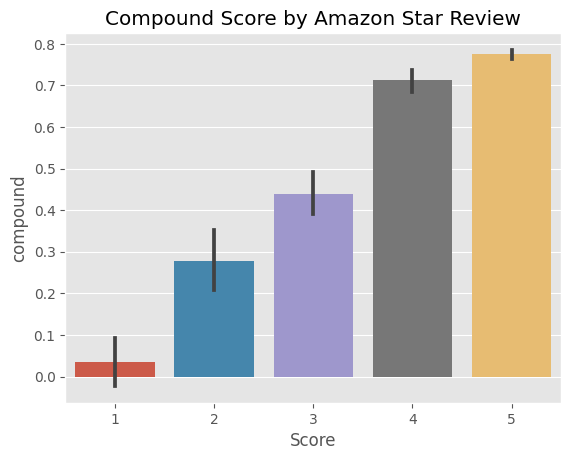

In [30]:
#plotting compound with respect to star score
ax= sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

From above plot, we can see that the Compound score ranges on 1 shows the review is 1 star rating and the compound score on 5 shows the review is Positive with 5 star ratings 

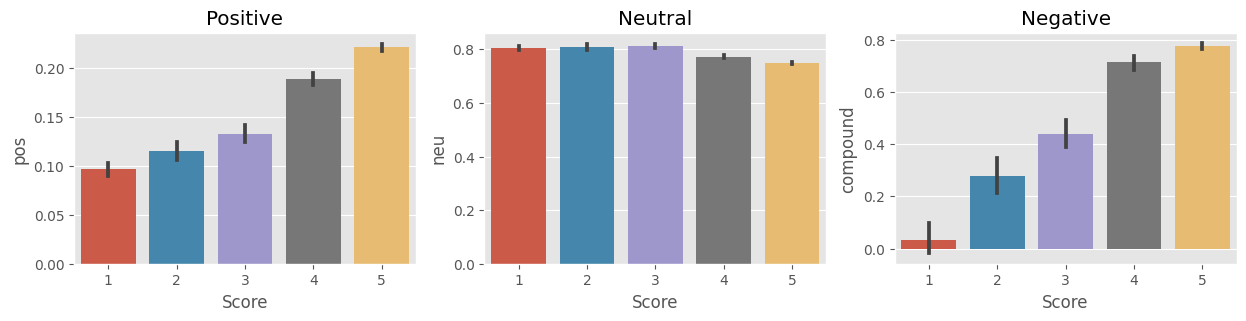

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=ax[1])
sns.barplot(data=vaders, x='Score', y='compound', ax=ax[2])
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.show()


# HuggingFace

### Roberta Pretrained Model

In [ ]:
pip install transformers

In [33]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
#https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)        # loads the pre-trained tokenizer
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is provided by the Cardiff NLP group, which specializes in natural language processing research and development.

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

This line loads the pre-trained neural network model for sentiment analysis, specifically a model for sequence classification, which means it can classify a given sequence of text into one of several possible categories (in this case, a sentiment category such as positive, negative, or neutral). 

In [35]:
#vader results on example
print(example)
sia.polarity_scores(example)

These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local candy store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 or 5 pound bags is a screaming deal as far as I'm concerned. I'm probably 50 pounds deep in these friggin' things. Consumed!


{'neg': 0.036, 'neu': 0.916, 'pos': 0.048, 'compound': 0.2228}

In [36]:
# Running example on Roberta model
#we are telling the tokenizer to encode the text sample example into a PyTorch tensor. 
encoded_text = tokenizer(example,return_tensors='pt')

In [37]:
print(encoded_text)

{'input_ids': tensor([[    0,  4528, 25920,  4468, 25008,  5408, 10361,     8, 11987,     8,
            98,    15,    32,   182,   205,     8, 22307,     8,   239,  1318,
             4,    20, 10361,   190,    33,   410,  2419,     4,   497,   127,
           400, 12644,  1400,    42,  1907,     9, 25008,  5408,  2682,    36,
           428, 12541,     6, 11987,     6, 24328,     6,  6751,     6, 31483,
             6,  3046,    43,    32,    59,    68,   698,    73, 17243,     4,
          1216,  9544, 15358,     9,   204,     4,   245,    50,   195,  6881,
          5565,    16,    10, 11347,   432,    25,   444,    25,    38,   437,
          2273,     4,    38,   437,  1153,   654,  2697,  1844,    11,   209,
         25805, 11405,   108,   383,     4,  9051, 28817,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1,

In [38]:
#This encoded text can be used as input to a PyTorch model
output = model(**encoded_text)

The ** syntax unpacks this dictionary and passes its contents as keyword arguments to the model function.

In [39]:
print(output)

SequenceClassifierOutput(loss=None, logits=tensor([[-1.4353,  0.0271,  1.8112]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [40]:
#converting the tensor output to numpy array
scores = output[0][0].detach().numpy()
print(scores)

[-1.4353259   0.02710098  1.8112068 ]


retrieves the first element of the first tensor in the output of the pre-trained neural network model, detaches it from the computation graph, and converts it to a NumPy array. 

In [41]:
#applying softmax
scores = softmax(scores)
print(scores)

[0.03223987 0.1391609  0.8285993 ]


In [42]:
scores_dict = {'roberta_neg': scores[0],
               'robert_neu':scores[1],
               'roberta_pos':scores[2]
               }
print(scores_dict)

{'roberta_neg': 0.032239873, 'robert_neu': 0.1391609, 'roberta_pos': 0.8285993}


In [43]:
# comparing with vader 
print(example)
sia.polarity_scores(example)

These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local candy store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 or 5 pound bags is a screaming deal as far as I'm concerned. I'm probably 50 pounds deep in these friggin' things. Consumed!


{'neg': 0.036, 'neu': 0.916, 'pos': 0.048, 'compound': 0.2228}

From Vader and Roberta, we can see that the Roberta supports the example as Positive and the fact is "example" is a positive review 

# Running Roberta on Entire dataset

In [44]:
def polarity_scores_roberta(data):
  encoded_text = tokenizer(data,return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
                'roberta_neg': scores[0],
                'robert_neu':scores[1],
                'roberta_pos':scores[2]
               }
  return scores_dict

In [45]:
res = {}
for index, row in df.iterrows():
    try:
      text = row['Text']
      myid = row['Id']
      
      #vader result
      vader_result = sia.polarity_scores(text)
      vader_result_rename = {}
      for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value

      #roberta result
      roberta_result = polarity_scores_roberta(text)

      #This line of code creates a new dictionary both by merging two dictionaries vader_result_rename and roberta_result.
      #The ** operator in Python is used to unpack the contents of a dictionary into another dictionary. 
      both = {**vader_result_rename,**roberta_result}
        
      res[myid] = both
      
    except RuntimeError:
      print(f"Broke for id: {myid}")



Broke for id: 83
Broke for id: 187
Broke for id: 529
Broke for id: 540
Broke for id: 746
Broke for id: 863
Broke for id: 1053
Broke for id: 1070
Broke for id: 1156
Broke for id: 1321
Broke for id: 1375
Broke for id: 1498
Broke for id: 1575
Broke for id: 1796
Broke for id: 1826
Broke for id: 2169
Broke for id: 2248
Broke for id: 2476
Broke for id: 2492
Broke for id: 2584
Broke for id: 2610
Broke for id: 2897
Broke for id: 2898
Broke for id: 2902
Broke for id: 2928
Broke for id: 2942
Broke for id: 2944
Broke for id: 2947
Broke for id: 2948
Broke for id: 3022
Broke for id: 3023
Broke for id: 3025
Broke for id: 3306
Broke for id: 3788
Broke for id: 3969
Broke for id: 4107
Broke for id: 4110
Broke for id: 4307
Broke for id: 4316
Broke for id: 4408
Broke for id: 4483
Broke for id: 4512
Broke for id: 4553
Broke for id: 4583


In [49]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df,how='left')

In [50]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,robert_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Comparing Vader and Roberta

In [51]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'robert_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

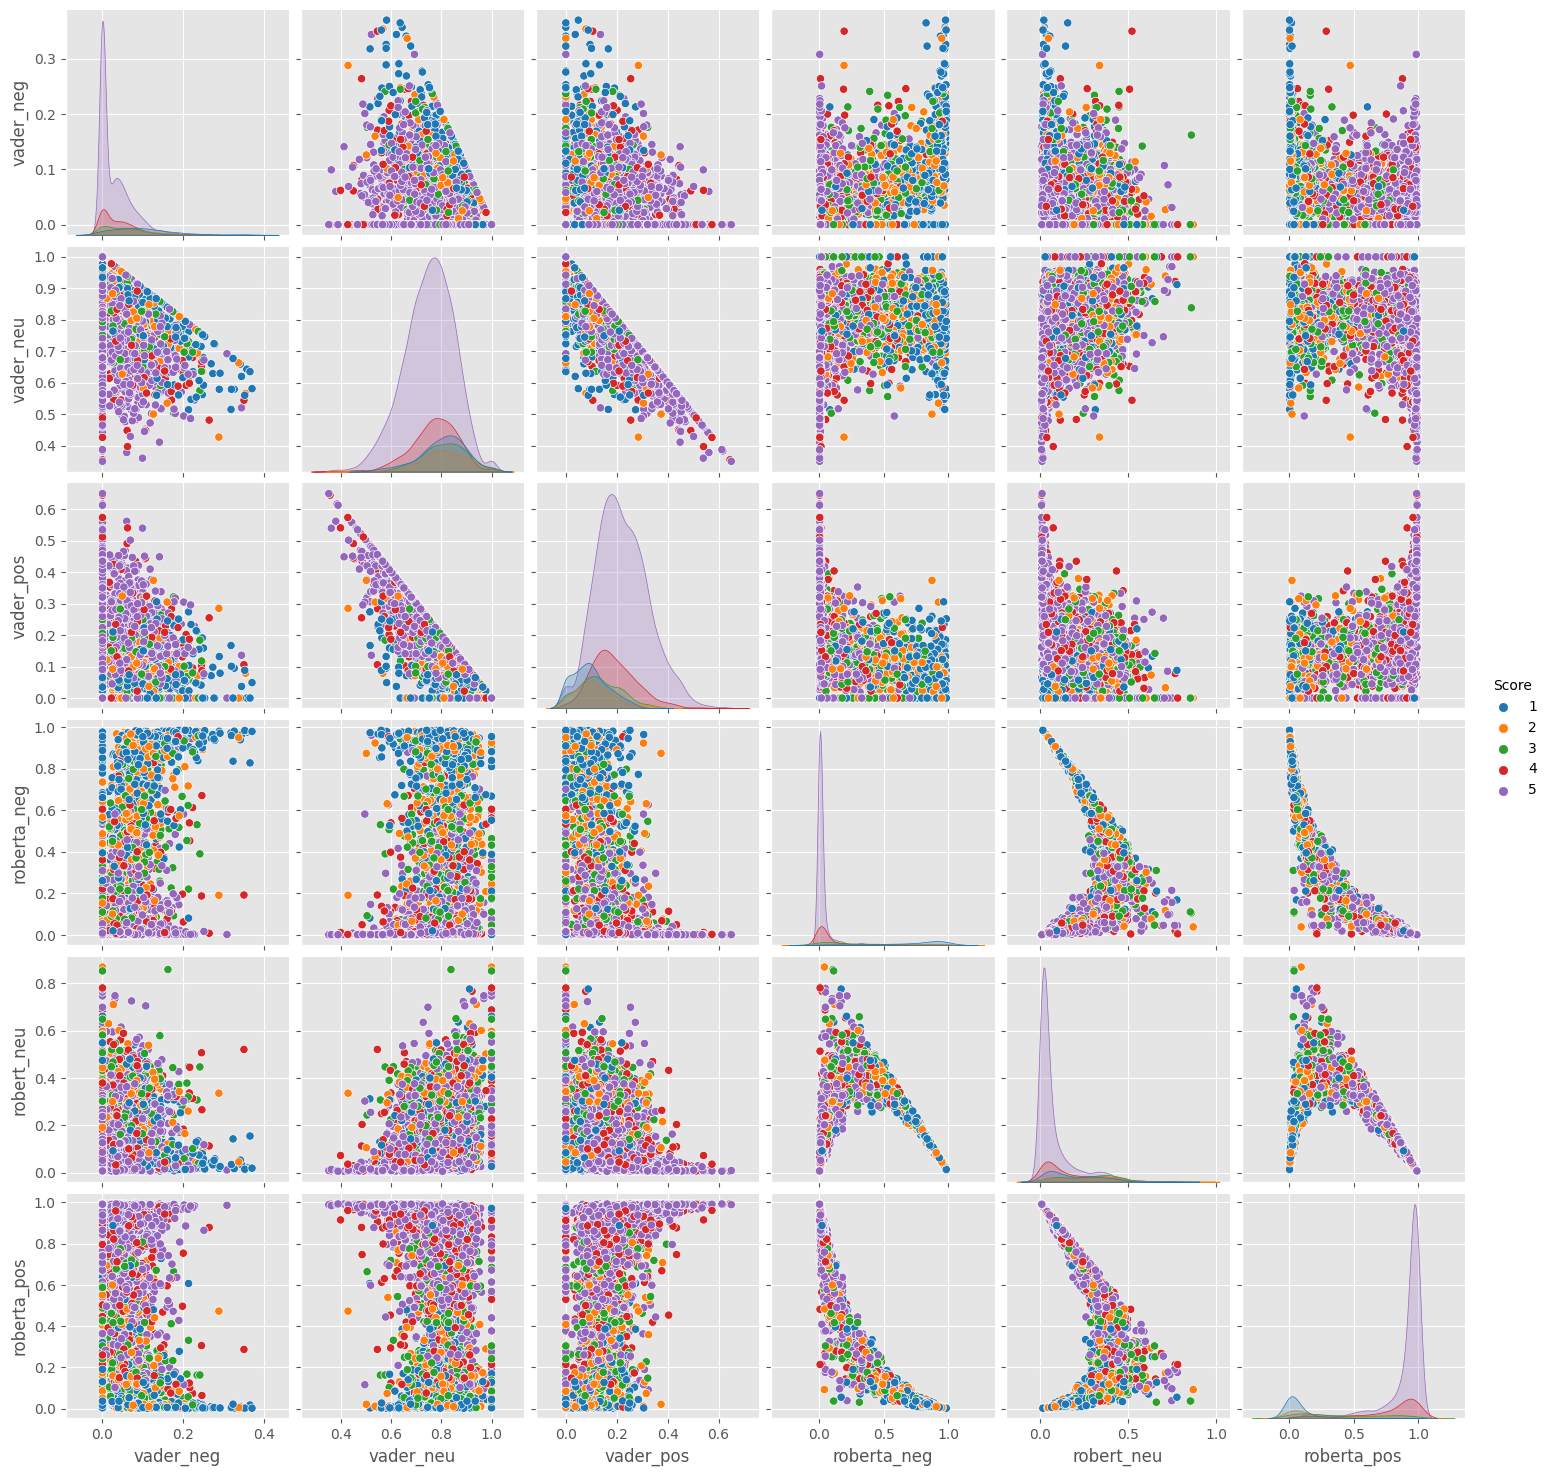

In [68]:
sns.pairplot(data=results_df,vars=['vader_neg', 'vader_neu', 'vader_pos', 
       'roberta_neg', 'robert_neu', 'roberta_pos'],
       hue = 'Score',
       palette = 'tab10')
plt.show()

#Reviewing the Model

In [58]:
#postive sentiment with 1 star review in roberta
results_df.query('Score==1').sort_values('roberta_pos',ascending=False).values[0]

array([4381, 0.0, 0.799, 0.201, 0.7003, 0.0019523482769727707,
       0.014828842133283615, 0.9832188487052917, 'B004391DK0',
       'AOYBPBZLGSDOK', 'gram', 0, 0, 1, 1350604800, 'gram',
       'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'],
      dtype=object)

In [59]:
#postive sentiment with 1 star review in vader
results_df.query('Score==1').sort_values('vader_pos',ascending=False).values[0]

array([4279, 0.0, 0.638, 0.362, 0.8118, 0.001776118646375835,
       0.03826964646577835, 0.9599542021751404, 'B004391DK0',
       'AA5HS6LQ8XC6G', 'Fantasticalice Alice "Phat G-ma"', 25, 39, 1,
       1287360000, 'Sugar,sugar,sugar',
       "Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"],
      dtype=object)

In [60]:
#negative sentiment with 5 star review in roberta
results_df.query('Score==5').sort_values('roberta_neg',ascending=False).values[0]

array([70, 0.344, 0.52, 0.136, -0.7345, 0.9601579308509827,
       0.03542909771203995, 0.004412968177348375, 'B000E7VI7S',
       'AWCBF2ZWIN57F', 'C. Salcido', 0, 2, 5, 1185753600,
       'pretzel haven!',
       'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'],
      dtype=object)

In [61]:
#negative sentiment with 5 star review in vader
results_df.query('Score==5').sort_values('vader_neg',ascending=False).values[0]

array([70, 0.344, 0.52, 0.136, -0.7345, 0.9601579308509827,
       0.03542909771203995, 0.004412968177348375, 'B000E7VI7S',
       'AWCBF2ZWIN57F', 'C. Salcido', 0, 2, 5, 1185753600,
       'pretzel haven!',
       'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'],
      dtype=object)

# **Transformers Pipeline**

The Transformers pipeline in Hugging Face is a high-level API that provides an easy-to-use interface for performing various natural language processing (NLP) tasks using pre-trained models from the Hugging Face Transformers library.

In [63]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [65]:
sent_pipeline('this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault')

[{'label': 'NEGATIVE', 'score': 0.9980344176292419}]

In [66]:
sent_pipeline("Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!")

[{'label': 'POSITIVE', 'score': 0.9471843242645264}]